In [1]:
# Load all FE models
from feature_extractor_models.stacked_convns_models import YODA as FE_ConvNS
from feature_extractor_models.stacked_add_models import YODA as FE_Add
from feature_extractor_models.stacked_addns_models import YODA as FE_AddNS
from feature_extractor_models.stacked_oner_models import YODA as FE_OneR
from feature_extractor_models.stacked_conv_models import YODA as FE_Conv


import torch
import numpy as np
import matplotlib.pyplot as plt

# Load Sample

In [2]:
# # Load im
# im_path = '../running_data/npy_dataset/val_raw_21/images/hst_14610_51_acs_wfc_f814w_jdb651_drc_22.npy'
# Load im
im_path = '../running_data/npy_dataset/val_raw_21/images/hst_14610_13_acs_wfc_f814w_jdb613_drc_23.npy'
im = np.load(im_path)

# Clean
im[im < 0] = 0.0
im = np.nan_to_num(im, nan=0.0, posinf=0.0, neginf=0.0)
im = np.clip(im, 0.0, 255.0)
im = im.reshape((1, 1, 1024, 1024))
im = np.ascontiguousarray(im)
im = torch.from_numpy(im)
im = im.float()

print()

# Preparing Model

In [3]:
fe_add = FE_Add(channels=7, kernels=(3, 5))
fe_add.load_state_dict(torch.load('./feature_extractor_models/weights/FE_stacked_add_n_5_3.pt'))

fe_addns = FE_AddNS(channels=7, kernels=(1, 3,))
fe_addns.load_state_dict(torch.load('./feature_extractor_models/weights/FE_stacked_addns_s_3.pt'))

fe_conv = FE_Conv(channels=7, kernels=(3, 5))
fe_conv.load_state_dict(torch.load('./feature_extractor_models/weights/FE_stacked_conv_n_5_3.pt'))

fe_convns = FE_ConvNS(channels=7, kernels=(1, 3))
fe_convns.load_state_dict(torch.load('./feature_extractor_models/weights/FE_stacked_convns_s_3.pt'))

fe_oner = FE_OneR(channels=7, kernels=(3,))
fe_oner.load_state_dict(torch.load('./feature_extractor_models/weights/FE_oner_m_3.pt'))

models = [fe_add, fe_addns, fe_conv, fe_convns, fe_oner]
models_name = ['add', 'add_ns', 'conv', 'conv_ns', 'oner']
print()

# Inferencing

In [4]:
outputs = []
for m in models:
    m.eval()
    outputs.append(m(im)[0].cpu().detach().numpy().reshape(1024, 1024))

# Normal Format Ploting

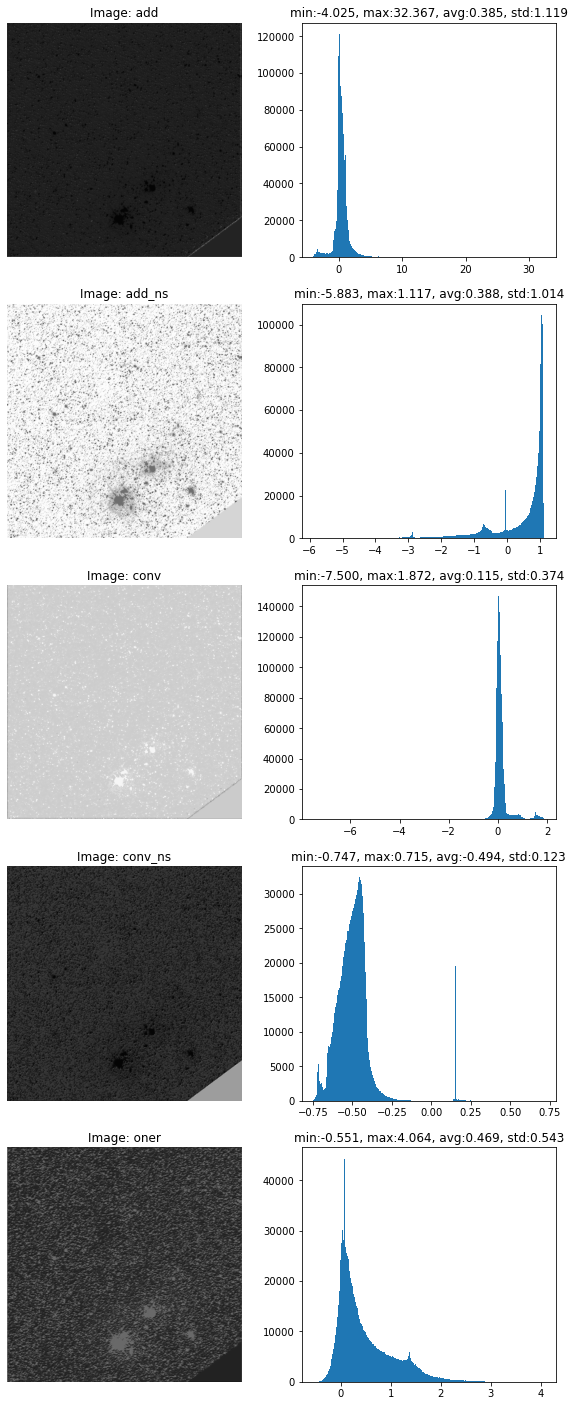

In [5]:
fig, axs = plt.subplots(len(outputs), 2, figsize=(10, 5*len(outputs)))
# Iterate over each image and plot
for i in range(len(outputs)):
    # Plot the image
    axs[i, 0].imshow(outputs[i], cmap='gray')
    axs[i, 0].set_title(f'Image: {models_name[i]}')

    # Plot the histogram
    axs[i, 1].hist(outputs[i].ravel(), bins=256)
    axs[i, 1].set_title(f'min:{outputs[i].min():.3f}, max:{outputs[i].max():.3f}, avg:{outputs[i].mean():.3f}, std:{outputs[i].std():.3f}')

    # Set appropriate axis labels
    axs[i, 0].axis('off')
    # axs[i, 1].set_xlim([0, 255])

plt.show()

# YOLO-like Format Ploting

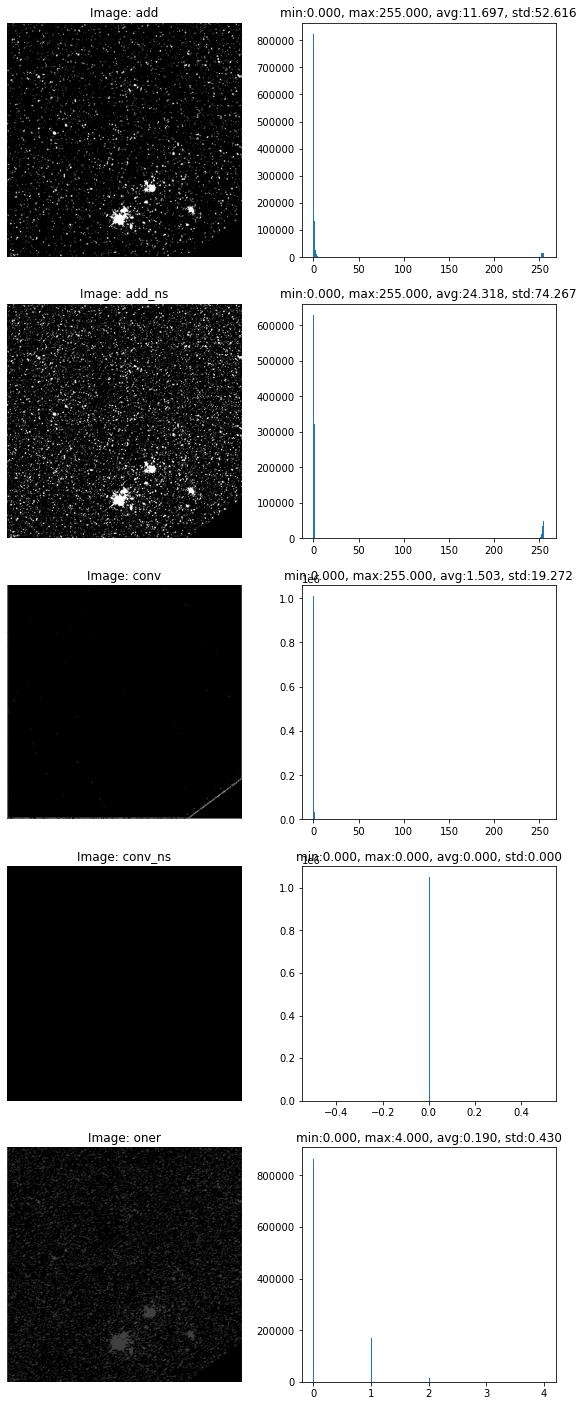

In [6]:
fig, axs = plt.subplots(len(outputs), 2, figsize=(10, 5*len(outputs)))
# Iterate over each image and plot
for i in range(len(outputs)):
    # Plot the image
    
    # YOLO Plot format
    im_to_plot = np.full((1024, 1024), 255, dtype=np.uint8)
    im_to_plot[:, :] = outputs[i][:, :]
    
    
    axs[i, 0].imshow(im_to_plot, cmap='gray')
    axs[i, 0].set_title(f'Image: {models_name[i]}')

    # Plot the histogram
    axs[i, 1].hist(im_to_plot.ravel(), bins=256)
    axs[i, 1].set_title(f'min:{im_to_plot.min():.3f}, max:{im_to_plot.max():.3f}, avg:{im_to_plot.mean():.3f}, std:{im_to_plot.std():.3f}')

    # Set appropriate axis labels
    axs[i, 0].axis('off')
    # axs[i, 1].set_xlim([0, 255])

plt.show()